## Check $\beta = 0.1$ for sim 522:

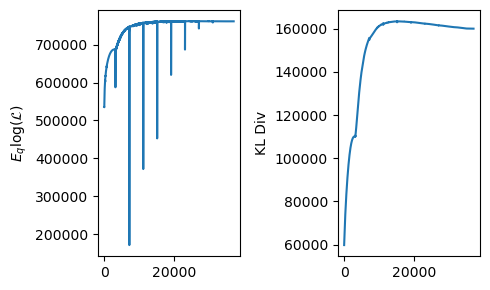

In [3]:
import pickle
with open('/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_remove_bad_l2_sims_test_kl_reg/xi_emu_combined_inducing_500_latents_40_leave18.pkl.attrs','rb') as f:
    attrs = pickle.load(f)

from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,2, figsize=(5,3))
kl_history =  np.array(attrs['kl_history'][800:])
recon = -np.array(attrs['loss_history'][800:]) + kl_history
ax[0].plot(recon)
ax[1].plot(kl_history)
ax[0].set_ylabel(r'$E_q \log(\mathcal{L})$')
ax[1].set_ylabel(f'KL Div')
fig.tight_layout()


In [1]:
import importlib
from gal_goku import plot
importlib.reload(plot)
import numpy as np
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
train_subdir = 'train_remove_bad_l2_sims_test_kl_reg'

plot_xi_emu = plot.PlotXiEmu(data_dir=data_dir, train_subdir=train_subdir, eval_loo=False)
plot_xi_emu.truth, plot_xi_emu.pred, plot_xi_emu.w_matrices, plot_xi_emu.loss_hist = [], [], [], []
pred, truth, loss_hist, w = plot_xi_emu._predict_and_calculate_error(s=18, y_err_th = 1)
plot_xi_emu.pred.append(pred)
plot_xi_emu.truth.append(truth)
plot_xi_emu.w_matrices.append(w)
plot_xi_emu.loss_hist.append(loss_hist)
plot_xi_emu.frac_errs = []
plot_xi_emu.frac_errs.append(np.abs(pred/truth - 1))
plot_xi_emu.sim_tags = [plot_xi_emu.sim_tags[18]]



2025-09-03 16:03:09.576460: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-03 16:03:09.579849: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-03 16:03:09.589834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756933389.606138 1931485 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756933389.610993 1931485 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756933389.624280 1931485 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

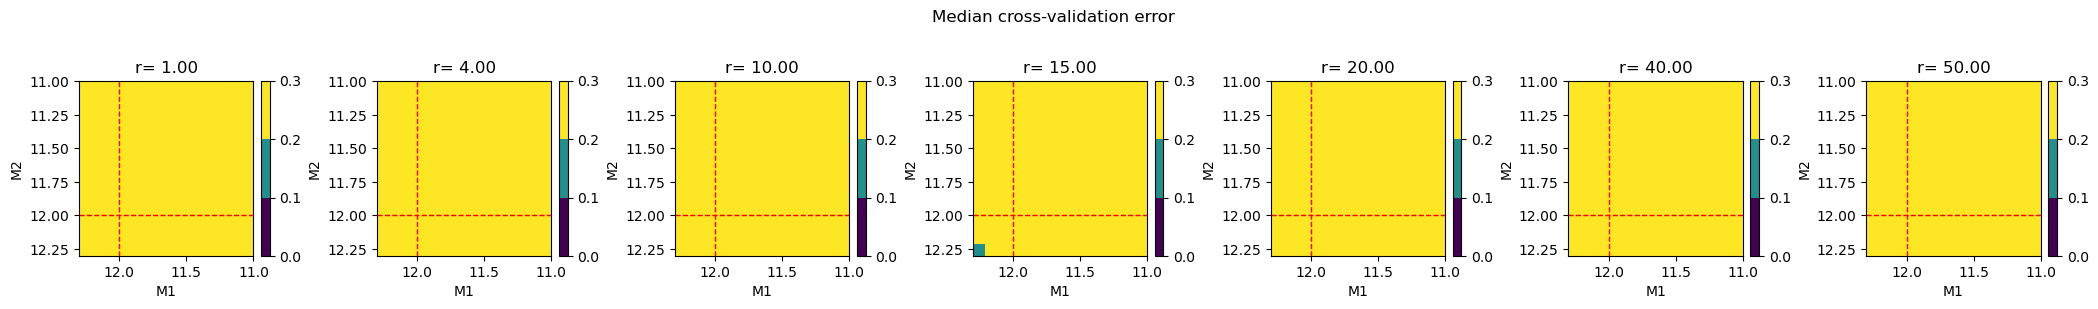

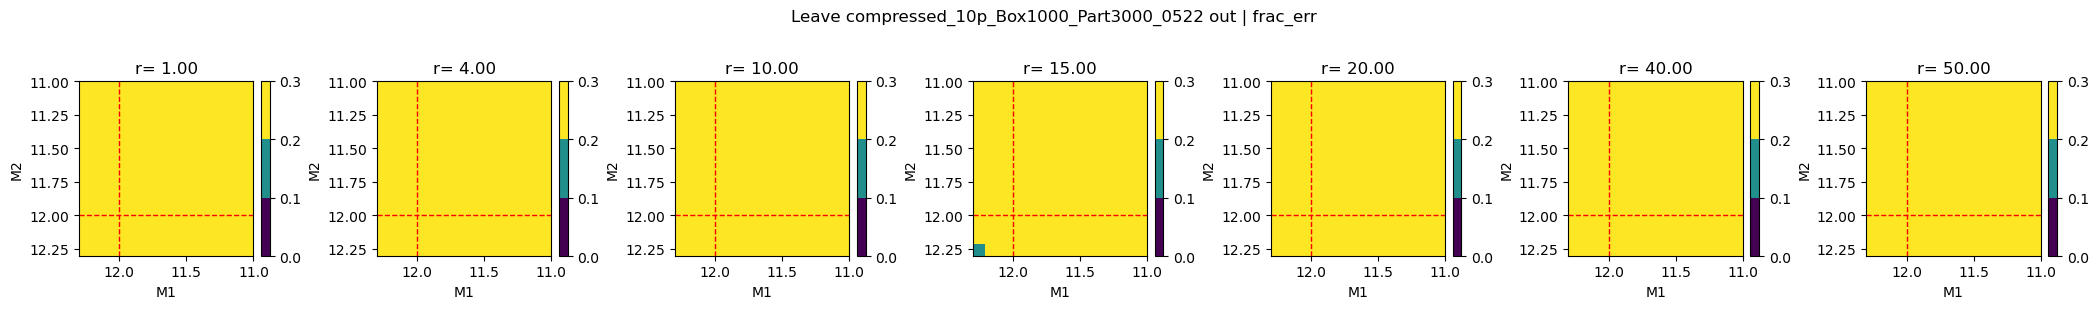

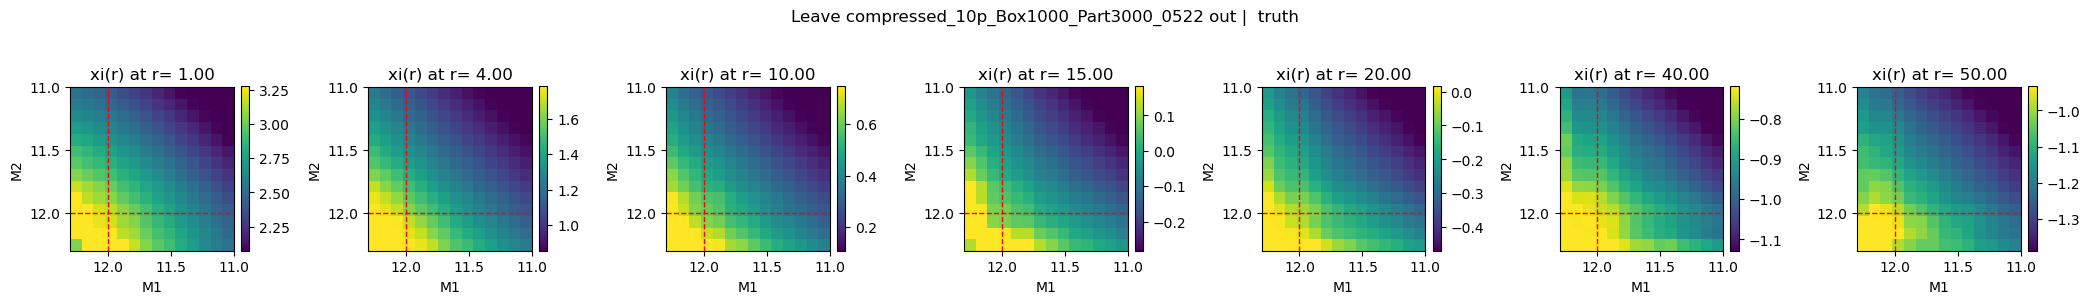

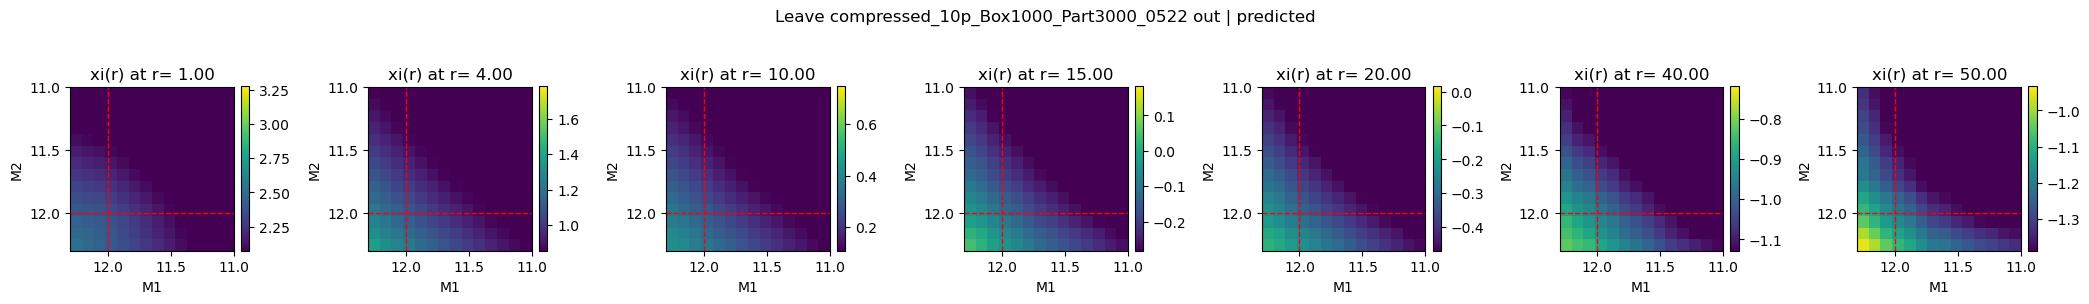

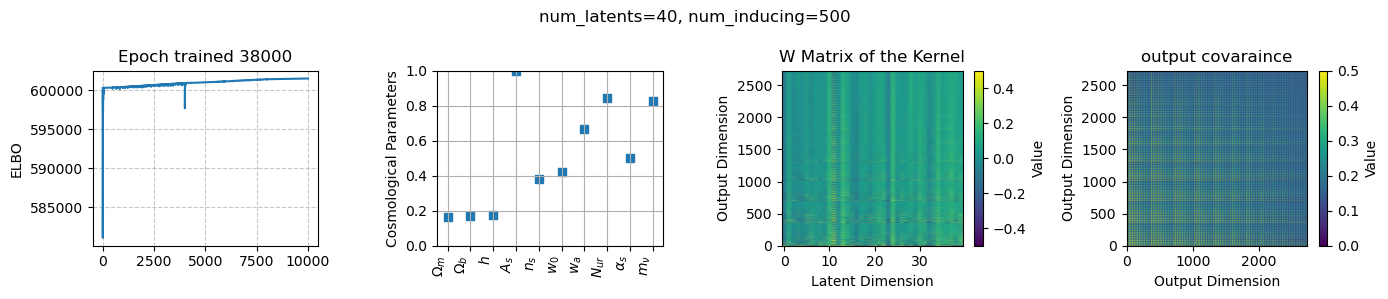

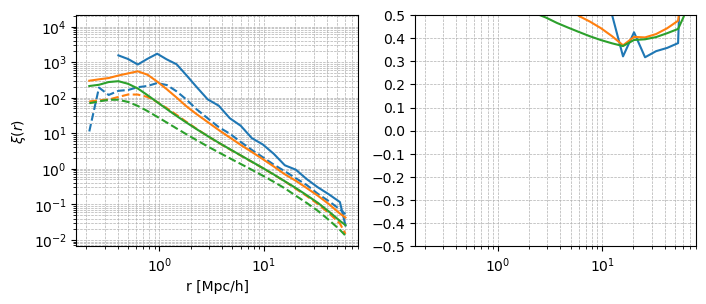

In [2]:
plot_xi_emu.cross_valid_2d_errs(mass_range=(12.3, 11.0))